In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# use sklearn to import a dataset
from sklearn.datasets import load_wine

In [2]:
df=pd.read_csv("train_joined.csv")
modify=df.copy()

In [3]:
modify.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,pct_it_workers,...,pct_college,pct_bb,earning,treasury_yield_10yr,monthly_unemp_rate,med_rent_zero_bed,med_rent_one_bed,med_rent_two_beds,med_rent_three_beds,annual_tax_rate
0,1001_2019-08-01,1001,Autauga County,Alabama,8/1/2019,3.007682,1249,2019,8,0.7,...,16.1,80.6,984.159963,1.59,0.029,620.0,743.0,880.0,1112.0,6.03
1,1001_2019-09-01,1001,Autauga County,Alabama,9/1/2019,2.884870,1198,2019,9,0.7,...,16.1,80.6,1002.543389,1.90,0.026,620.0,743.0,880.0,1112.0,6.03
2,1001_2019-10-01,1001,Autauga County,Alabama,10/1/2019,3.055843,1269,2019,10,0.7,...,16.1,80.6,999.057181,1.76,0.025,620.0,743.0,880.0,1112.0,6.03
3,1001_2019-11-01,1001,Autauga County,Alabama,11/1/2019,2.993233,1243,2019,11,0.7,...,16.1,80.6,996.766106,1.82,0.024,620.0,743.0,880.0,1112.0,6.03
4,1001_2019-12-01,1001,Autauga County,Alabama,12/1/2019,2.993233,1243,2019,12,0.7,...,16.1,80.6,1020.530595,1.82,0.026,620.0,743.0,880.0,1112.0,6.03


In [3]:
modify.insert(7,"is_2020","")

In [5]:
for index in range(0,122265):
    if modify['year'][index]<2020:
        modify['is_2020'][index]="pre_2020"
    elif modify['year'][index]==2020:
        modify["is_2020"][index]="in_2020"
    else:
        modify["is_2020"][index]="post_2020"

<ipython-input-5-20b5163bcd79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modify['is_2020'][index]="pre_2020"
<ipython-input-5-20b5163bcd79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modify["is_2020"][index]="in_2020"
<ipython-input-5-20b5163bcd79>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modify["is_2020"][index]="post_2020"


In [6]:
modify.to_csv("Year_Modified.csv")

In [79]:
modified=pd.read_csv("Year_Modified.csv")
modified.head()

,Unnamed: 0,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,is_2020,year,...,pct_college,pct_bb,earning,treasury_yield_10yr,monthly_unemp_rate,med_rent_zero_bed,med_rent_one_bed,med_rent_two_beds,med_rent_three_beds,annual_tax_rate
0,0,1001_2019-08-01,1001,Autauga County,Alabama,8/1/2019,3.007682,1249,pre_2020,2019,...,16.1,80.6,984.159963,1.59,0.029,620.0,743.0,880.0,1112.0,6.03
1,1,1001_2019-09-01,1001,Autauga County,Alabama,9/1/2019,2.884870,1198,pre_2020,2019,...,16.1,80.6,1002.543389,1.90,0.026,620.0,743.0,880.0,1112.0,6.03
2,2,1001_2019-10-01,1001,Autauga County,Alabama,10/1/2019,3.055843,1269,pre_2020,2019,...,16.1,80.6,999.057181,1.76,0.025,620.0,743.0,880.0,1112.0,6.03
3,3,1001_2019-11-01,1001,Autauga County,Alabama,11/1/2019,2.993233,1243,pre_2020,2019,...,16.1,80.6,996.766106,1.82,0.024,620.0,743.0,880.0,1112.0,6.03
4,4,1001_2019-12-01,1001,Autauga County,Alabama,12/1/2019,2.993233,1243,pre_2020,2019,...,16.1,80.6,1020.530595,1.82,0.026,620.0,743.0,880.0,1112.0,6.03


### 1. Boxplots of Density/Active Grouped by Is_2020

[(0.0, 100.0)]

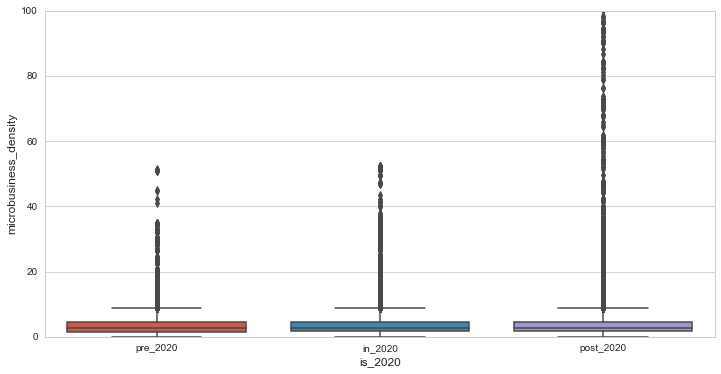

In [82]:
sns.set_style("whitegrid")
p1=sns.boxplot(x="is_2020",y="microbusiness_density",data=modified)
p1.set(ylim=(0,100))

#### From the boxplot above, we can clearly notice that the number of outliers of microbusiness density after year 2020 has increased. This phenomenon is very likely associated with goverment's aid policy during post-covid period.

In [83]:
modified.groupby('is_2020')[['microbusiness_density','med_rent_two_beds']].corr()

microbusiness_density  med_rent_two_beds
is_2020                                                                  
in_2020   microbusiness_density               1.000000           0.567797
          med_rent_two_beds                   0.567797           1.000000
post_2020 microbusiness_density               1.000000           0.384358
          med_rent_two_beds                   0.384358           1.000000
pre_2020  microbusiness_density               1.000000           0.440907
          med_rent_two_beds                   0.440907           1.000000

<AxesSubplot:xlabel='med_rent_two_beds'>

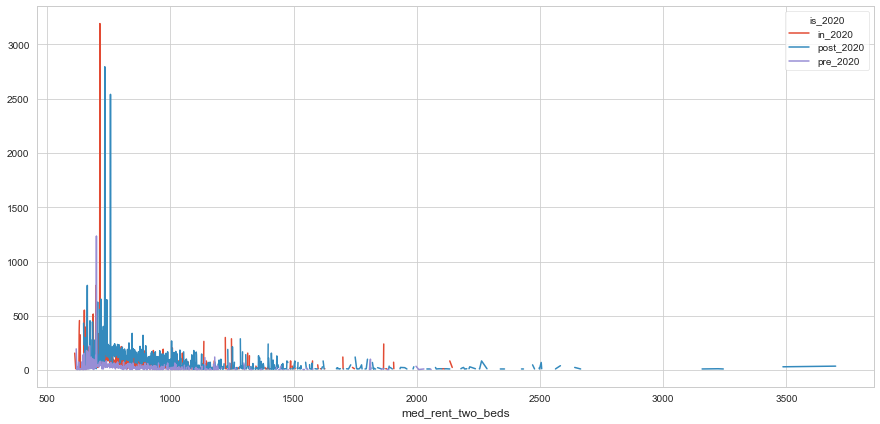

In [84]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
modified.groupby(['med_rent_two_beds','is_2020']).count()['microbusiness_density'].unstack().plot(ax=ax)

Text(0.5, 1.0, 'Two beds Rents vs Density before year 2020')

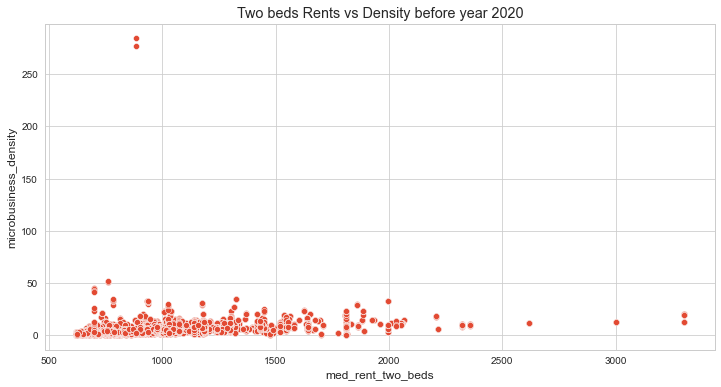

In [95]:
data1=modified[modified.is_2020=='pre_2020']
sns.scatterplot(x='med_rent_two_beds',y='microbusiness_density',data=data1)
plt.title("Two beds Rents vs Density before year 2020")

Text(0.5, 1.0, 'Two beds Rents vs Density in year 2020')

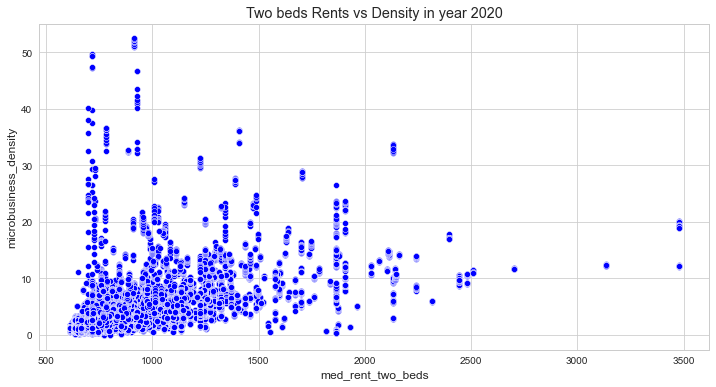

In [96]:
data2=data[data.is_2020=='in_2020']
sns.scatterplot(x='med_rent_two_beds',y='microbusiness_density',data=data2,color="blue")
plt.title("Two beds Rents vs Density in year 2020")

Text(0.5, 1.0, 'Two beds Rents vs Density after year 2020')

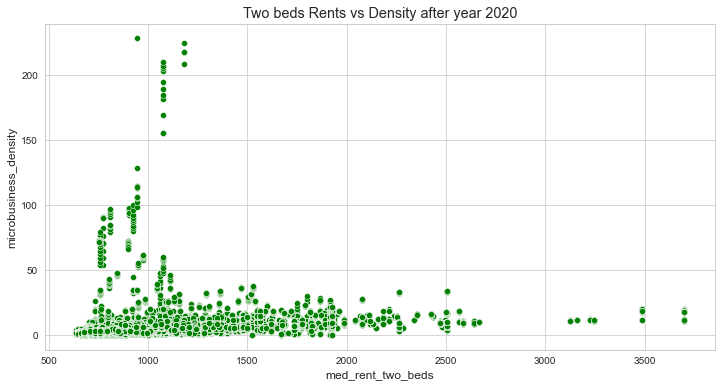

In [97]:
data3=data[data.is_2020=='post_2020']
sns.scatterplot(x='med_rent_two_beds',y='microbusiness_density',data=data3,color="green")
plt.title("Two beds Rents vs Density after year 2020")